In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [36]:
image = cv2.imread('megan.jpg')   

In [37]:
# Display the image
cv2.imshow('Original Image', image)

# Wait for a key press indefinitely
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()

In [6]:
image.shape

(337, 600, 3)

In [38]:
# image_blob = cv2.dnn.blobFromImage(image=image, scalefactor=1/255, size=(416,416), swapRB=True, crop=False)
image_blob = cv2.dnn.blobFromImage(image=image, scalefactor=1/255, size=(image.shape[1],image.shape[0]))

In [39]:
type(image_blob), image_blob.shape # 1 Indicates images in a batch

(numpy.ndarray, (1, 3, 337, 600))

In [10]:
network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\pc\AppData\Local\Temp\ipykernel_31304\3320162944.py:1: SyntaxWarning: invalid escape sequence '\W'
  network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')
C:\Users\pc\AppData\Local\Temp\ipykernel_31304\3320162944.py:1: SyntaxWarning: invalid escape sequence '\W'
  network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')


In [12]:
network.setInput(image_blob)
output = network.forward()  

In [14]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [15]:
output.shape    

(1, 44, 43, 75)

In [16]:
position_width = output.shape[3]
position_height = output.shape[2]

In [45]:
image1 = image.copy()

In [81]:
num_points = 15 
points = []
threshold = 0.1

for i in range(num_points): 
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map)
    
    x = int((image1.shape[1] * point[0]) / position_width)
    y = int((image1.shape[0] * point[1]) / position_height)
    print(f"Body part {i} - Position ({x}, {y}) - Confidence {confidence}")

    if confidence > threshold:
        cv2.circle(image1, (x, y), 8, (0, 255, 0), thickness=-1)
        cv2.putText(image1, f'{i}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255))
        points.append((x, y))
    else:
        points.append(None)


Body part 0 - Position (224, 26) - Confidence 0.7554596662521362
Body part 1 - Position (248, 70) - Confidence 0.9123879075050354
Body part 2 - Position (232, 106) - Confidence 0.6697722673416138
Body part 3 - Position (208, 141) - Confidence 0.7503767609596252
Body part 4 - Position (176, 168) - Confidence 0.7385097146034241
Body part 5 - Position (280, 70) - Confidence 0.7186093330383301
Body part 6 - Position (320, 44) - Confidence 0.7753999829292297
Body part 7 - Position (360, 17) - Confidence 0.7418547868728638
Body part 8 - Position (288, 203) - Confidence 0.5037320256233215
Body part 9 - Position (320, 283) - Confidence 0.7334719300270081
Body part 10 - Position (320, 363) - Confidence 0.6221848130226135
Body part 11 - Position (312, 186) - Confidence 0.5226558446884155
Body part 12 - Position (336, 283) - Confidence 0.94032222032547
Body part 13 - Position (296, 345) - Confidence 0.7596977949142456
Body part 14 - Position (280, 141) - Confidence 0.7704717516899109


In [88]:
# for i in range(num_points): 
#     confidence_map = output[0, i, :, :]
#     _, confidence, _, point = cv2.minMaxLoc(confidence_map)
#     print(len(confidence_map))
#     print(confidence, point)
#     break;

In [23]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

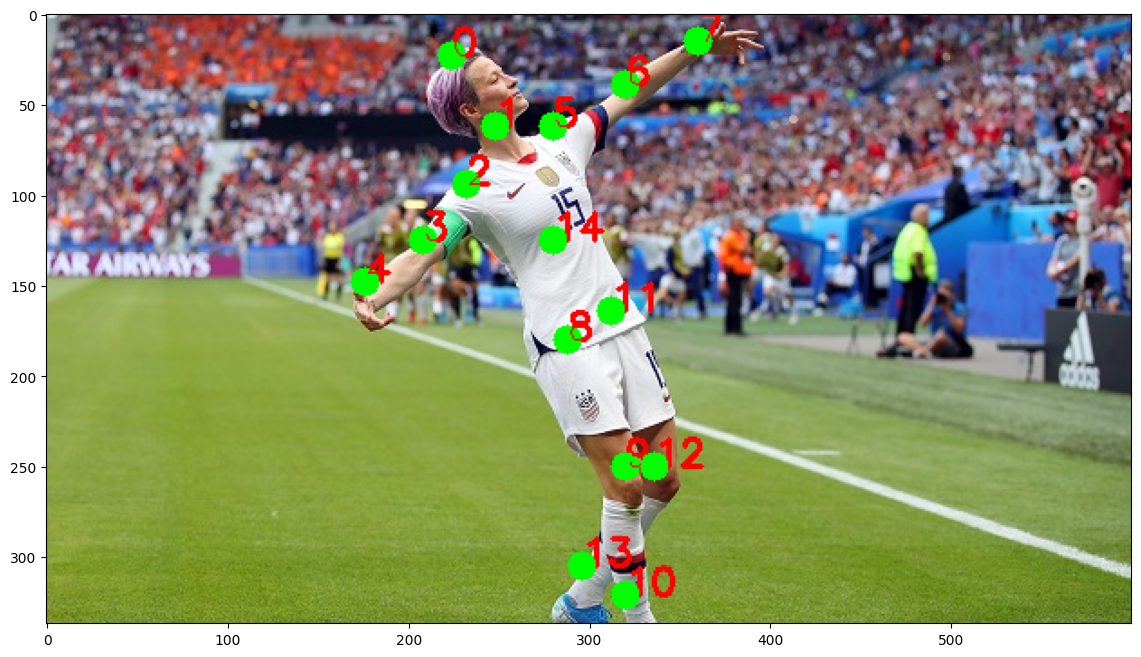

In [56]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB));

In [3]:
points_connections = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [4]:
points_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [62]:
for connection in points_connections:
    start_point = connection[0]
    end_point = connection[1]
    

    if points[start_point] and points[end_point]:
        cv2.line(image1, points[start_point], points[end_point], (255, 0, 0))    

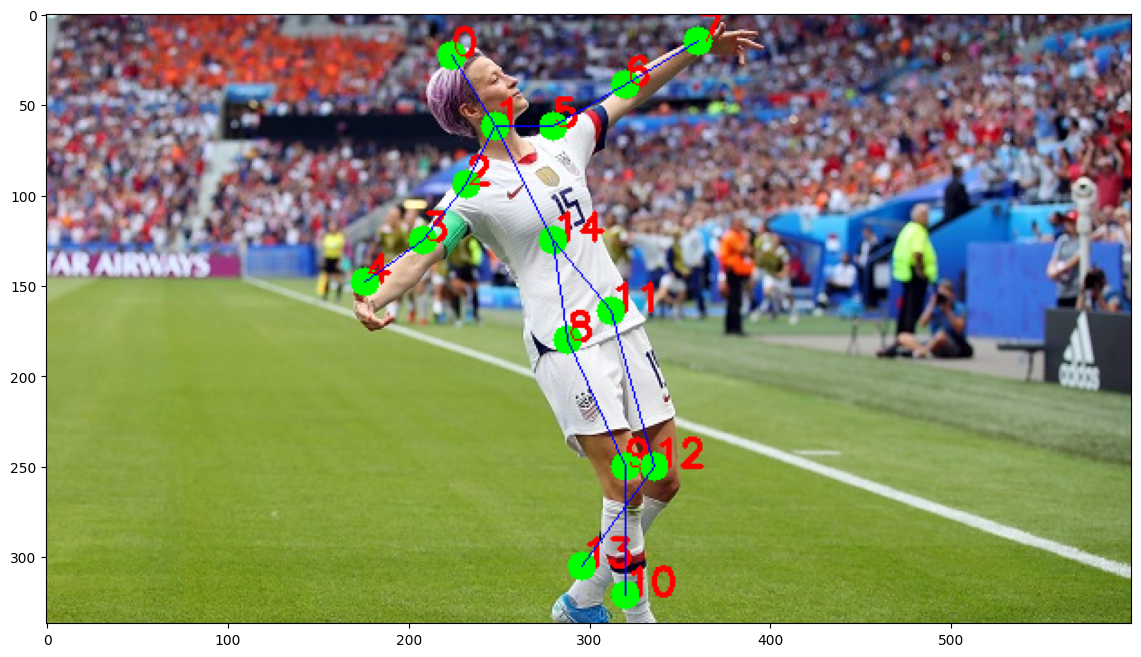

In [63]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB));

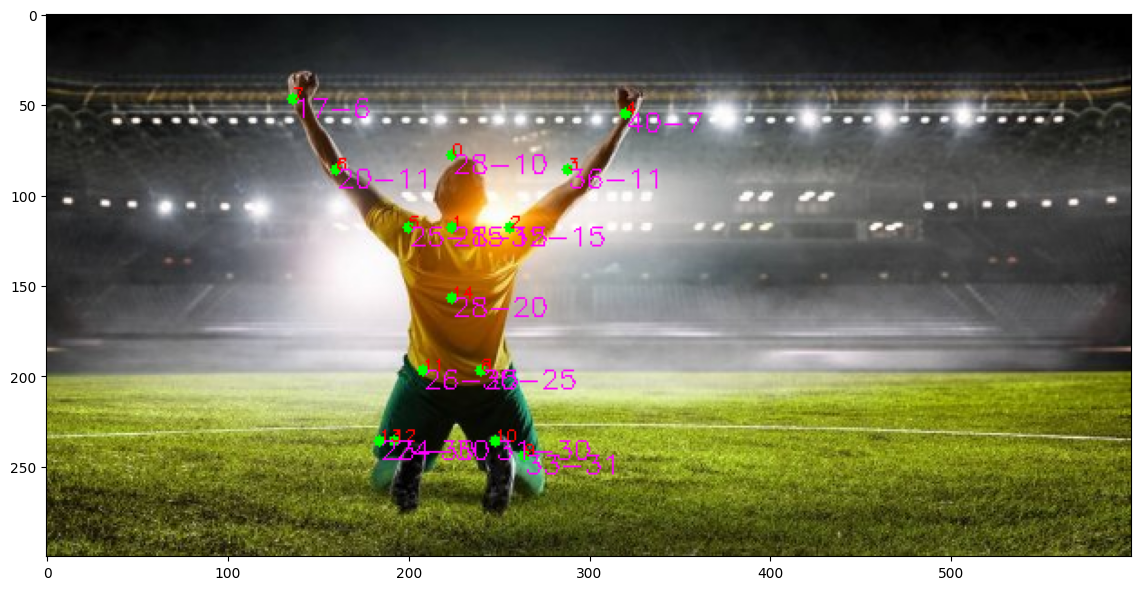

In [99]:
image2 = cv2.imread('player.jpg')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255, size = (image2.shape[1], image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
position_width = output2.shape[3]
position_height = output2.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output2[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
  x = int((image2.shape[1] * point[0]) / position_width)
  y = int((image2.shape[0] * point[1]) / position_height)
  
  if confidence > threshold:
    cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));

# Videos

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def verify_arms_up(points):
    head, right_wrist, left_wrist = 0, 0, 0
    head, right_wrist, left_wrist = points[0][1], points[4][1], points[7][1]

    if left_wrist < head and right_wrist < head:
        return True
    else:
        return False

    




In [4]:
def verify_legs_up(points):

    left_Leg, right_Leg, left_shoulder, right_shoulder = 0, 0, 0, 0
    left_Leg, right_Leg, left_shoulder, right_shoulder = points[13][0], points[10][0], points[5][0], points[2][0]

    if left_Leg > left_shoulder and right_Leg < right_shoulder:
        return True    
    return False




In [5]:
video = 'gesture1.mp4'
capture = cv2.VideoCapture(video)
conneced, frame = capture.read()

In [6]:
network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\pc\AppData\Local\Temp\ipykernel_25564\3320162944.py:1: SyntaxWarning: invalid escape sequence '\W'
  network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')
C:\Users\pc\AppData\Local\Temp\ipykernel_25564\3320162944.py:1: SyntaxWarning: invalid escape sequence '\W'
  network = cv2.dnn.readNetFromCaffe('..\Weights\pose_deploy_linevec_faster_4_stages.prototxt', '..\Weights\pose_iter_160000.caffemodel')


In [7]:
points_connections = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [8]:
conneced, frame.shape

(True, (1080, 808, 3))

In [9]:
result = 'gesture1_result.mp4'
save = cv2.VideoWriter(result, cv2.VideoWriter_fourcc(*'XVID'), 60, (frame.shape[1], frame.shape[0]))

In [10]:
# https://stackoverflow.com/questions/5217519/what-does-opencvs-cvwaitkey-function-do

video = 'gesture1.mp4'
capture = cv2.VideoCapture(video)
conneced, frame = capture.read()

threshold = 0.1
# while cv2.waitKey(1) < 0:
while conneced:
  connected, frame = capture.read()

  if not connected:
    break

  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))
  # image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (frame.shape[1], frame.shape[0]))
  network.setInput(image_blob)
  output = network.forward()
  position_height = output.shape[2]
  position_width = output.shape[3]

  num_points = 15
  points = []
  for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map)
    x = int((frame.shape[1] * point[0]) / position_width)
    y = int((frame.shape[0] * point[1]) / position_height)
    if confidence > threshold:
      cv2.circle(frame, (x, y), 5, (0,255,0), thickness = -1)
      cv2.putText(frame, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 255))
      points.append((x, y))
    else:
      points.append(None)

  for connection in points_connections:
    partA = connection[0]
    partB = connection[1]
    if points[partA] and points[partB]:
      cv2.line(frame, points[partA], points[partB], (255,0,0)) 

  # print(points[13][0], points[10][0], points[5][0], points[2][0])
  # print(points[13][0], points[10][0])
  if verify_arms_up(points) and verify_legs_up(points):
  # if verify_arms_up(points) :
    cv2.putText(frame, 'Complete', (50,200), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255))

  if cv2.waitKey(1) & 0xFF == ord('q'):
        break

  cv2.imshow('', frame)
  save.write(frame)
  
save.release()
cv2.destroyAllWindows()

# confusion

in a code where im trying to get pose estimation. 

threshold = 0.1
# while cv2.waitKey(1) < 0:
while conneced:
  connected, frame = capture.read()

  if not connected:
    break

  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))
  # image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (frame.shape[1], frame.shape[0]))
  network.setInput(image_blob)
  output = network.forward()
  position_height = output.shape[2]
  position_width = output.shape[3]

why does 
  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))
work but not
  # image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (frame.shape[1], frame.shape[0]))
?